# <H1><center>**HR Attrition Data Analysis**

---
---

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, time


from scipy.stats import shapiro, kstest
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, f_oneway
from scipy.stats import mannwhitneyu, kruskal, wilcoxon, normaltest

In [2]:
hr = pd.DataFrame(pd.read_csv('HR Data.xlsx - HR data.csv'))
hr

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Yes,Non-Travel,25 - 34,Ex-Employees,R&D,Technical Degree,STAFF-1905,1905,Male,Research Scientist,...,4,2,80,1,5,3,5,2,3,0
1466,Yes,Travel_Frequently,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-1868,1868,Male,Research Scientist,...,4,2,80,0,1,2,1,0,1,0
1467,Yes,Travel_Frequently,35 - 44,Ex-Employees,Sales,Other,STAFF-1667,1667,Male,Sales Executive,...,4,1,80,0,13,4,11,9,6,7
1468,Yes,Travel_Rarely,Under 25,Ex-Employees,R&D,Life Sciences,STAFF-1878,1878,Male,Research Scientist,...,4,1,80,0,1,3,1,0,0,0


In [3]:
hr.drop(['0'], axis=1, inplace=True)
hr.drop(['-2'], axis=1, inplace=True)
hr.drop(['Employee Count'], axis=1, inplace=True)
hr.drop(['Standard Hours'], axis=1, inplace=True)

## ATTRITION RATE

In [4]:
attritionlv = pd.DataFrame(hr['Attrition'])
attritionlv = pd.DataFrame(attritionlv.groupby('Attrition').value_counts()).reset_index()
attritionlv

,Attrition,count
0,No,1233
1,Yes,237


([<matplotlib.patches.Wedge at 0x1609e0050>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '83.9%'),
  Text(0.5246681853915082, -0.29107266315815716, '16.1%')])

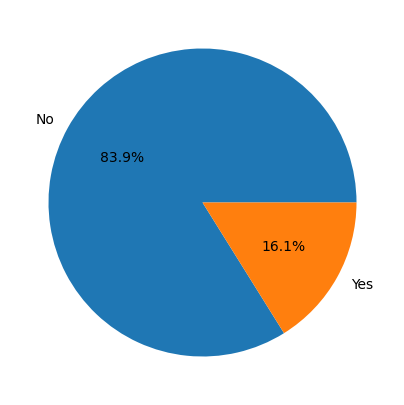

In [5]:
plt.figure(figsize=(5,5))
plt.pie(attritionlv['count'], labels=attritionlv['Attrition'], autopct='%1.1f%%')

## ATTRITION BY AGE AND EDUCATION LEVEL

In [6]:
agebandedu = pd.DataFrame(hr[['CF_age band', 'Education']][hr['Attrition']=='Yes'])
agebandedu = agebandedu.groupby(['CF_age band', 'Education']).value_counts().reset_index()
agebandedu

,CF_age band,Education,count
0,25 - 34,Associates Degree,18
1,25 - 34,Bachelor's Degree,48
2,25 - 34,Doctoral Degree,3
3,25 - 34,High School,12
4,25 - 34,Master's Degree,31
5,35 - 44,Associates Degree,11
6,35 - 44,Bachelor's Degree,24
7,35 - 44,Doctoral Degree,1
8,35 - 44,High School,2
9,35 - 44,Master's Degree,13


<Axes: xlabel='CF_age band', ylabel='count'>

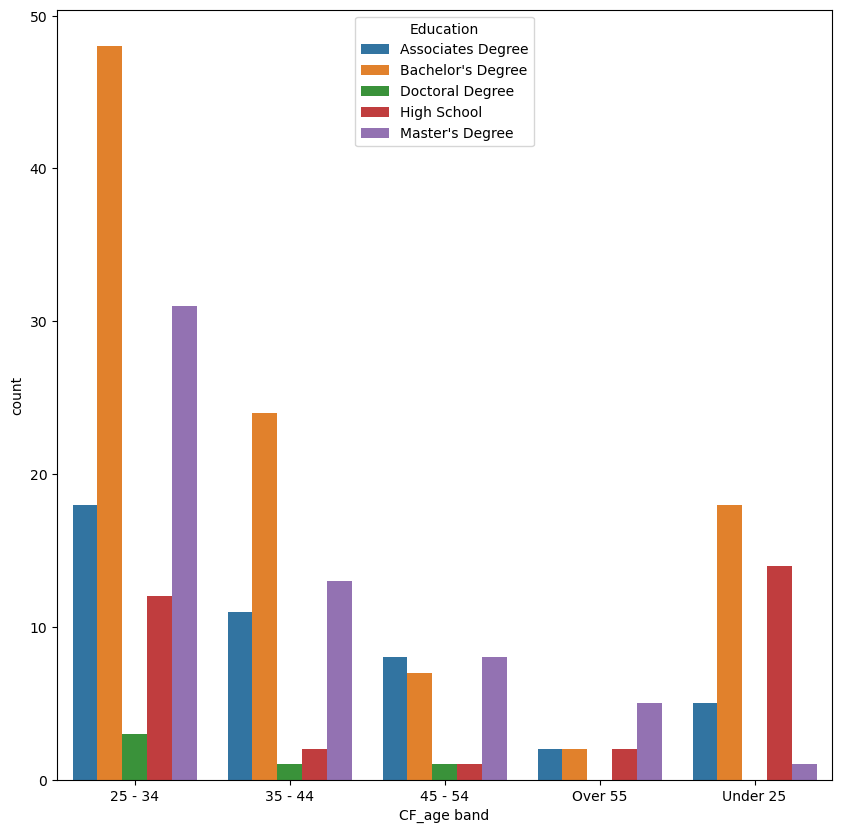

In [7]:
plt.figure(figsize=(10,10))

sns.barplot(x=agebandedu['CF_age band'],
            y= agebandedu['count'],
            hue = agebandedu['Education'])

## ATTRITION RATE BY DEPARTMENT

In [8]:
dept = hr.groupby('Department')['Attrition'].value_counts(normalize=True).reset_index()
dept['pct'] = dept['proportion']*100
dept

,Department,Attrition,proportion,pct
0,HR,No,0.809524,80.952381
1,HR,Yes,0.190476,19.047619
2,R&D,No,0.861602,86.160250
3,R&D,Yes,0.138398,13.839750
4,Sales,No,0.793722,79.372197
5,Sales,Yes,0.206278,20.627803


Text(0, 0.5, 'Percentage (%)')

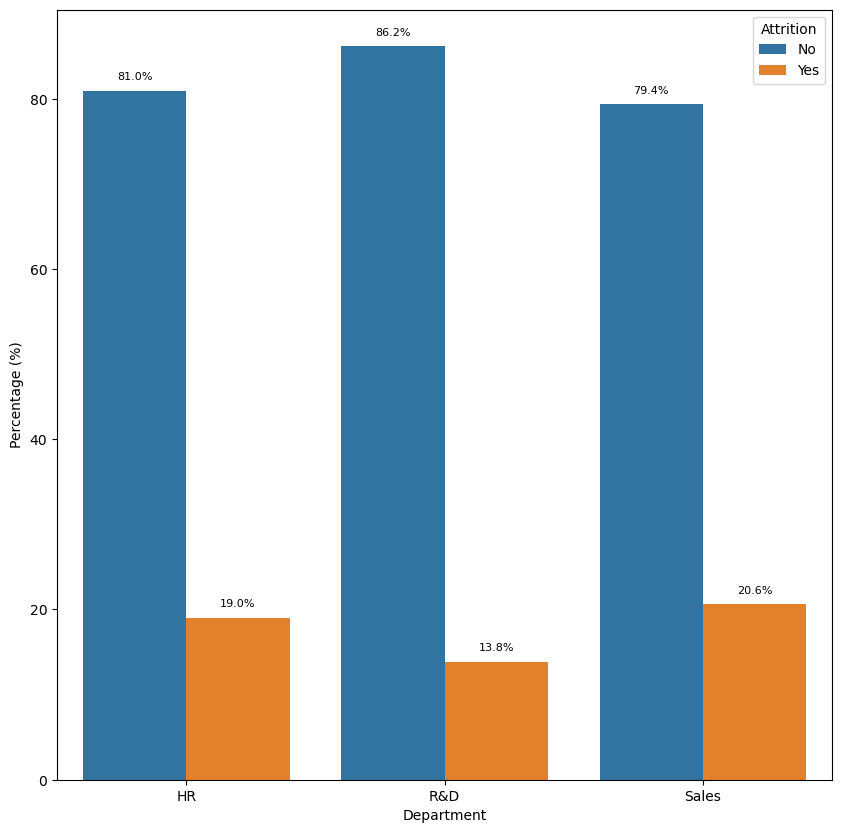

In [9]:
plt.figure(figsize=(10,10))

ab = sns.barplot(x=dept['Department'],
            y=dept['pct'],
            hue = dept['Attrition'])

# Adding data labels to the bars
for p in ab.patches:
    height = p.get_height()
    ab.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')


# dept.set_index('Department').plot(kind='bar', stacked=True)

plt.ylabel('Percentage (%)')

## ATTRITION’S JOB ROLE FACTOR - EMPLOYEE PROPORTION

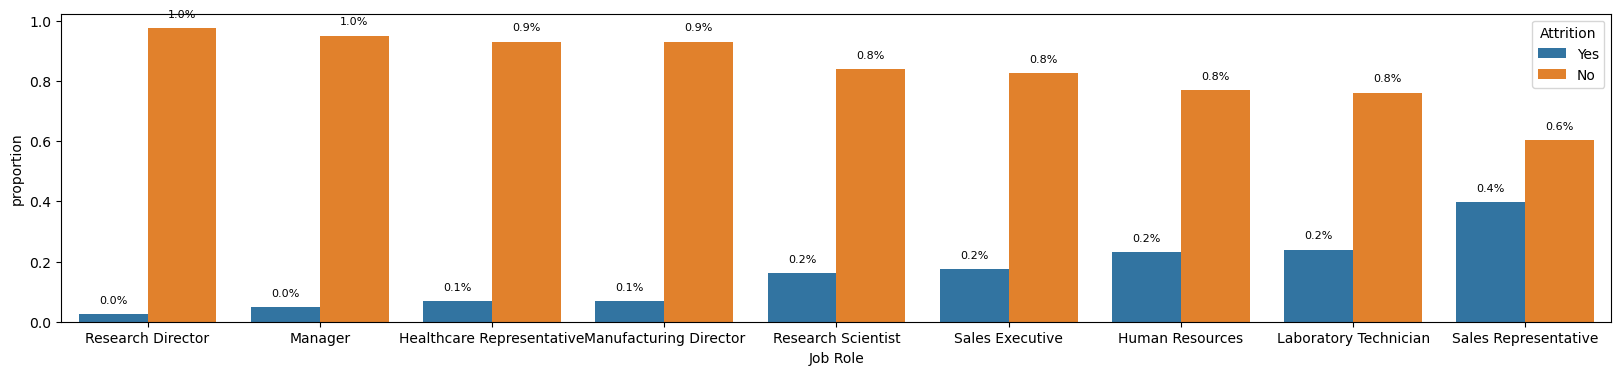

In [10]:
tabel=hr.groupby("Job Role")["Attrition"].value_counts(normalize=True).reset_index().sort_values(by="proportion")
tabel

plt.figure(figsize=(20,4))
ae = sns.barplot(data=tabel,x="Job Role",y="proportion",hue="Attrition")

for p in ae.patches:
    height = p.get_height()
    ae.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')
    
plt.savefig("a.png",transparent=True)

## ATTRITION’S EXTERNAL FACTOR - DISTANCE FROM HOME

In [11]:
welf5 = hr.pivot_table(
    index=['Attrition'],
    values=['Distance From Home'], 
    aggfunc=np.mean
)

welf5 = welf5.reset_index()
welf5

,Attrition,Distance From Home
0,No,8.915653
1,Yes,10.632911


Text(0.5, 1.0, 'ATTRITION’S EXTERNAL FACTOR - DISTANCE FROM HOME')

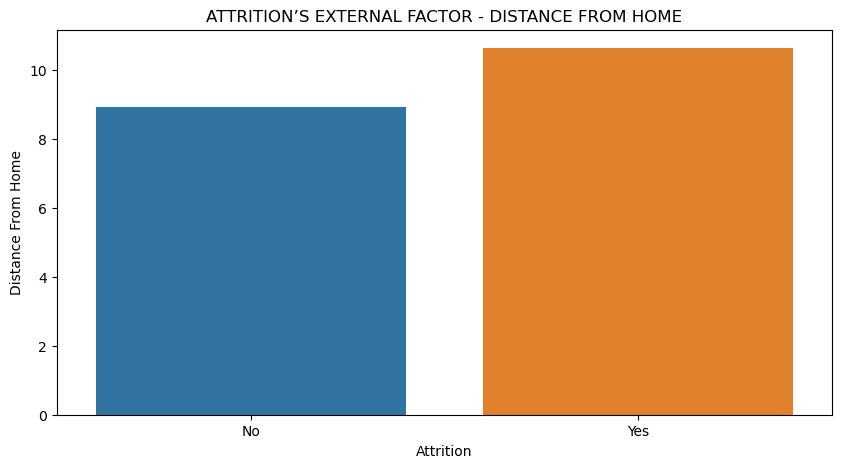

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=welf5['Attrition'],
            y=welf5['Distance From Home'])
plt.savefig("a.png",transparent=True)
plt.title('ATTRITION’S EXTERNAL FACTOR - DISTANCE FROM HOME')

## ATTRITION’S OVERTIME FACTOR - MONTHLY INCOME

In [13]:

income = hr.pivot_table(
    index='Over Time', 
    columns='Attrition', 
    values=['Monthly Income'], 
    aggfunc=lambda x: np.mean(x) / * 100
)
income

SyntaxError: invalid syntax (3070280249.py, line 5)

In [ ]:
overtime=hr.groupby("Attrition")["Over Time"].value_counts(normalize=True).reset_index()
overtime

,Attrition,Over Time,proportion
0,No,No,0.765612
1,No,Yes,0.234388
2,Yes,Yes,0.535865
3,Yes,No,0.464135


In [ ]:
income2 = overtime.pivot_table(
    index='Over Time', 
    columns='Attrition', 
    values=['proportion'], 
    aggfunc=np.mean
)

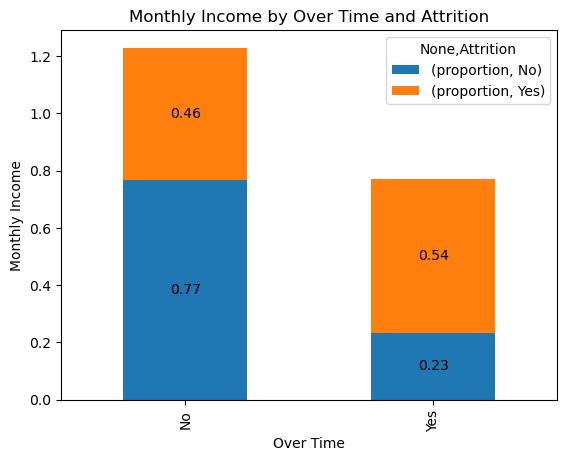

In [ ]:
# Plotting the bar chart
ax = income2.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Over Time')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Over Time and Attrition')

# Adding data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')


# Display the plot
plt.show()

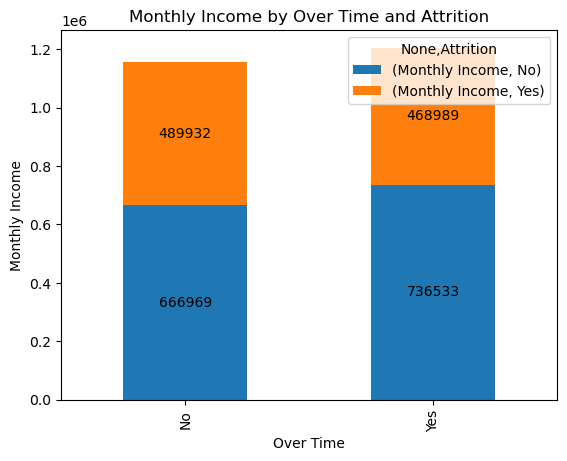

In [ ]:
# Plotting the bar chart
ax = income.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Over Time')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Over Time and Attrition')

# Adding data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

# Display the plot
plt.show()

## EMPLOYEE'S SATISFACTION SURVEY


In [ ]:
welf_ = hr.pivot_table(
    index=['Attrition'],
    values=['Environment Satisfaction', 'Job Satisfaction', 'Relationship Satisfaction','Work Life Balance'], 
    aggfunc=np.mean
)

welf_

,Environment Satisfaction,Job Satisfaction,Relationship Satisfaction,Work Life Balance
Attrition,,,,
No,2.771290,2.778589,2.733982,2.781022
Yes,2.464135,2.468354,2.599156,2.658228


In [ ]:
welf = welf_.reset_index()
welf

,Attrition,Environment Satisfaction,Job Satisfaction,Relationship Satisfaction,Work Life Balance
0,No,2.771290,2.778589,2.733982,2.781022
1,Yes,2.464135,2.468354,2.599156,2.658228


In [ ]:
welf_melted = pd.melt(welf, id_vars=['Attrition'], var_name='Variable', value_name='Value')
welf_melted


,Attrition,Variable,Value
0,No,Environment Satisfaction,2.771290
1,Yes,Environment Satisfaction,2.464135
2,No,Job Satisfaction,2.778589
3,Yes,Job Satisfaction,2.468354
4,No,Relationship Satisfaction,2.733982
5,Yes,Relationship Satisfaction,2.599156
6,No,Work Life Balance,2.781022
7,Yes,Work Life Balance,2.658228


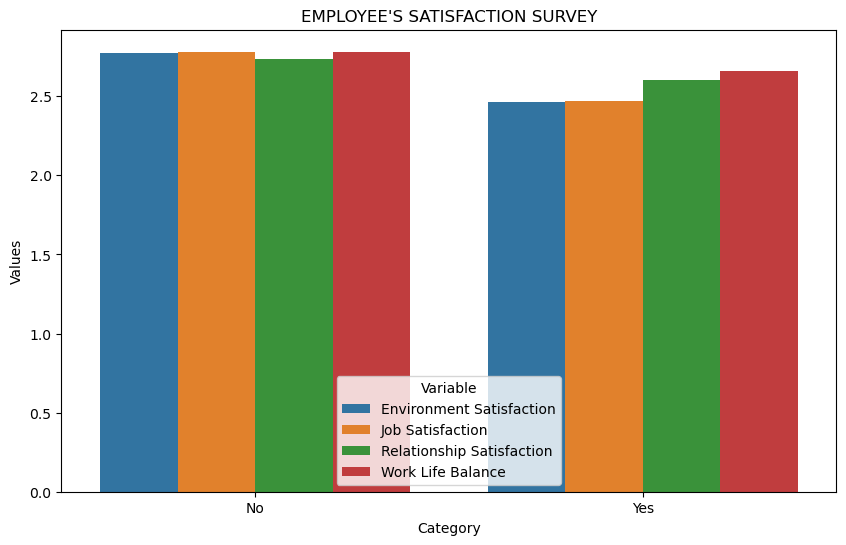

In [ ]:
welf_melted = pd.melt(welf, id_vars=['Attrition'], var_name='Variable', value_name='Value')
welf_melted

plt.figure(figsize=(10, 6))

sns.barplot(x='Attrition', y='Value', hue='Variable', data=welf_melted)

plt.xlabel('Category')
plt.ylabel('Values')
plt.title("EMPLOYEE'S SATISFACTION SURVEY")

plt.show()


## Conclusion

1. Company attention rate are 16% where Sales department are the most department that have attrition

2. Ex-employee age band are ranged between 25 and 34, with most educational background from Bachelor’s Degree

3. Sales Representative have the highest attrition rate 39,76%. Higher change for a certain individual to leave this type of job role in the company

4. Ex-employee are dissatisfied with the working condition in the company.

5. 53% of ex-employee were working over time with average monthly income lower than the current employee

6. Ex-employee average distance from home are 10.6 miles, much farther than current employee with 8.9 miles

## Recommendation

1. Deep dive to investigate the issue causing high attrition in Sales Department, especially for Sales Representative role.

2. Improving working condition on the company to raise the employee satisfaction score

3. Raise the incentives for employee working over time and balancing on workload distribution

4. Hire talent with distance from home less than 8 to 9 miles or considering remote work policies